In [2]:
from numpy import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Fake data

In [36]:
n_examples = 1000

citationIds = ['citation%s'%id for id in range(n_examples)]
latitudes =  [39.299236 + random.rand() - 0.5 for _ in range(n_examples)]
longitudes = [-76.609383 + random.rand() -0.5 for _ in range(n_examples)]
political_neigh = random.choice(['North', 'Northeast', 'East', 'Southeast', 
                                 'South', 'Southwest', 'West', 'Northwest', 'Central'],n_examples)

bmoreZips = [21201, 21202, 21203, 21205, 21206, 
             21209, 21210, 21211, 21212, 21213, 
             21214, 21215, 21216, 21217, 21218, 
             21223, 21224, 21229, 21230, 21231, 
             21233, 21235, 21239, 21241, 21251, 
             21263, 21264, 21270, 21273, 21275, 
             21278, 21279, 21280, 21281, 21287, 
             21288, 21289, 21290, 21297, 21298]
zipcodes = [str(random.choice(bmoreZips)) for _ in range(n_examples)]

current_balance = random.randint(75,150,n_examples)

In [11]:
df = pd.DataFrame({'citationId':citationIds,
                   'latitude':latitudes,
                   'longitude':longitudes,
                  'political_neighborhood':political_neigh,
                  'zipcode':zipcodes,
                  'balance':current_balance})
df.head()

,balance,citationId,latitude,longitude,political_neighborhood,zipcode
0,100,citation0,39.296687,-76.376014,Northwest,21264
1,98,citation1,39.258185,-76.794852,South,21230
2,76,citation2,39.360320,-76.264458,Central,21275
3,120,citation3,38.821104,-76.367387,Central,21233
4,131,citation4,39.343000,-76.381391,North,21263


### Real data

In [6]:
names=['citationId','latitude','longitude','hood','number','street','zipcode','zip_suffix','landmark']
df = pd.read_csv('geocode.txt',sep='\t',names=names)

In [7]:
df.head()

,citationId,latitude,longitude,hood,number,street,zipcode,zip_suffix,landmark
0,62756441,39.287318,-76.626216,Downtown,700,West Lombard Street,21201,null,Penn Street
1,62756458,39.297446,-76.617617,Downtown,105,West Monument Street,21201,4701,null
2,62757704,39.285519,-76.590076,Fells Point,505,South Wolfe Street,21231,3009,null
3,62757712,39.285519,-76.590076,Fells Point,505,South Wolfe Street,21231,3009,null
4,62757720,39.285519,-76.590076,Fells Point,505,South Wolfe Street,21231,3009,null


### Some fake balance data for now

In [8]:
num_rows = df.shape[0]
df['balance'] = random.randint(75,500,num_rows)
df.head()

,citationId,latitude,longitude,hood,number,street,zipcode,zip_suffix,landmark,balance
0,62756441,39.287318,-76.626216,Downtown,700,West Lombard Street,21201,null,Penn Street,89
1,62756458,39.297446,-76.617617,Downtown,105,West Monument Street,21201,4701,null,150
2,62757704,39.285519,-76.590076,Fells Point,505,South Wolfe Street,21231,3009,null,334
3,62757712,39.285519,-76.590076,Fells Point,505,South Wolfe Street,21231,3009,null,246
4,62757720,39.285519,-76.590076,Fells Point,505,South Wolfe Street,21231,3009,null,119


### Processing

In [9]:
pn_df = df.groupby('hood',as_index=False).agg({'balance':['mean','sum'],'citationId':'count'})
pn_df.columns = ["_".join(x) for x in pn_df.columns.ravel()]
pn_df.head()

,hood_,balance_mean,balance_sum,citationId_count
187,Roland Park,481.0,962,2
39,Christopher,456.0,456,1
133,Medford - Broening,455.0,455,1
196,South Gate,441.0,441,1
217,Western Run Park,435.0,435,1


### Citation count analysis

In [16]:
pn_df = pn_df.sort_values('citationId_count',ascending=False)
pn_df.head()

,hood_,balance_mean,balance_sum,citationId_count
50,Downtown,285.216336,258406,906
40,Claremont - Freedom,285.892962,194979,682
60,Edmondson Village,286.401980,144633,505
146,Morrell Park,287.170526,136406,475
231,Wyndhurst,282.123832,120749,428


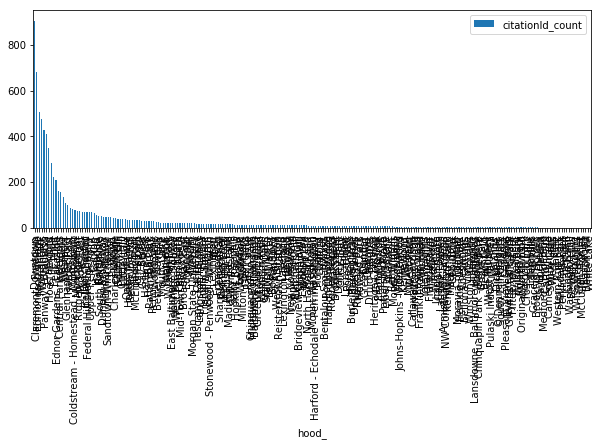

In [17]:
pn_df.plot(x='hood_', y='citationId_count', kind='bar',figsize=(10,4))

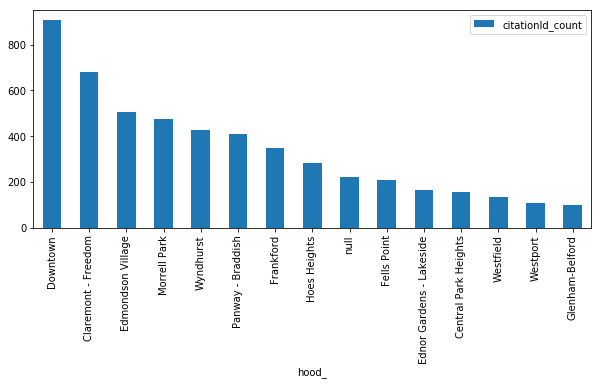

In [23]:
pn_df.head(15).plot(x='hood_', y='citationId_count', kind='bar',figsize=(10,4))

### Balance analysis

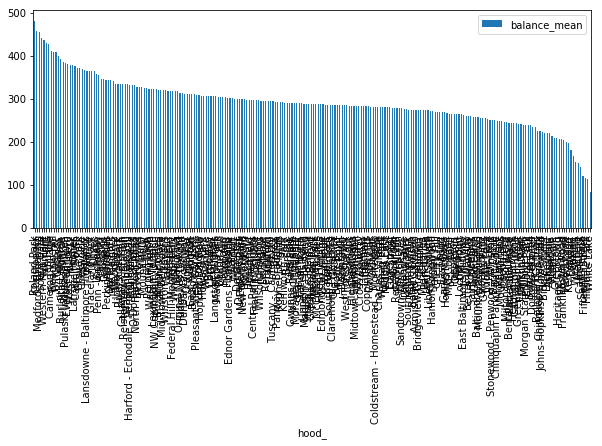

In [26]:
pn_df = pn_df.sort_values('balance_mean',ascending=False)
pn_df.plot(x='hood_', y='balance_mean', kind='bar',figsize=(10,4))

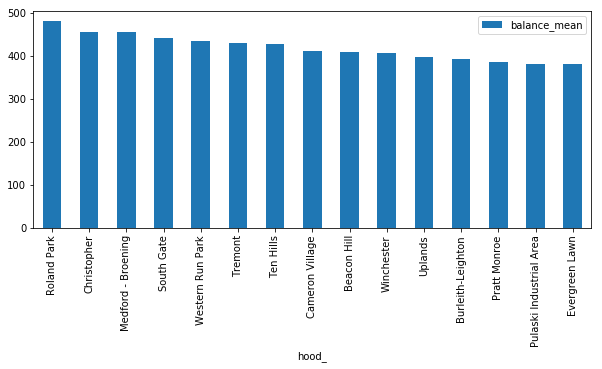

In [27]:
pn_df.head(15).plot(x='hood_', y='balance_mean', kind='bar',figsize=(10,4))

### Analysis by zip code

In [29]:
zip_df = df.groupby('zipcode',as_index=False).agg({'balance':['mean','sum'],'citationId':'count'})
zip_df.columns = ["_".join(x) for x in zip_df.columns.ravel()]
zip_df.head()

,zipcode_,balance_mean,balance_sum,citationId_count
0,11776,315.00,630,2
1,15301,254.00,254,1
2,20613,125.00,125,1
3,20705,405.00,405,1
4,20720,367.25,1469,4


In [30]:
zip_df = zip_df.sort_values('citationId_count',ascending=False)
zip_df.head()

,zipcode_,balance_mean,balance_sum,citationId_count
28,21213,286.586085,243025,848
17,21201,285.378810,196626,689
38,21223,289.701807,192362,664
18,21202,288.919453,190109,658
44,21229,290.366013,177704,612


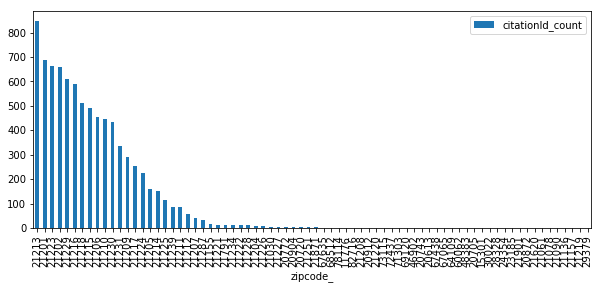

In [31]:
zip_df.plot(x='zipcode_', y='citationId_count', kind='bar',figsize=(10,4))

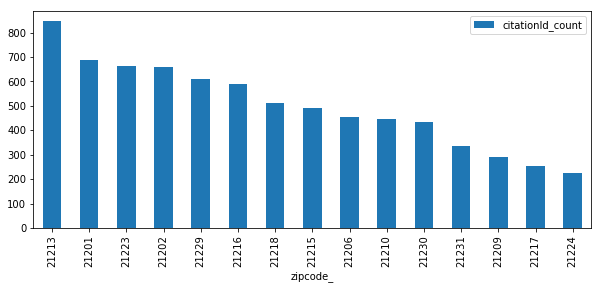

In [32]:
zip_df.head(15).plot(x='zipcode_', y='citationId_count', kind='bar',figsize=(10,4))

In [33]:

zip_df = zip_df.sort_values('balance_mean',ascending=False)
zip_df.head()

,zipcode_,balance_mean,balance_sum,citationId_count
56,24354,466.0,466,1
70,72437,463.0,463,1
72,78114,445.0,890,2
11,21061,441.0,441,1
12,21078,414.0,414,1


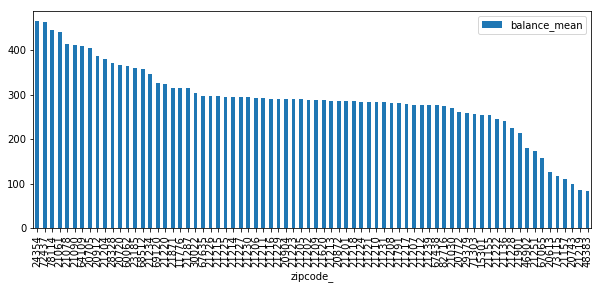

In [34]:
zip_df.plot(x='zipcode_', y='balance_mean', kind='bar',figsize=(10,4))

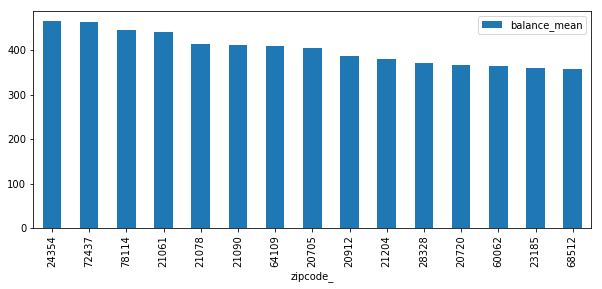

In [35]:
zip_df.head(15).plot(x='zipcode_', y='balance_mean', kind='bar',figsize=(10,4))

In [48]:
badzips = df[~df['zipcode'].isin(bmoreZips)]['zipcode'].unique().sort()

NameError: name 'sort' is not defined